In [3]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
with open("./final_output_spacing.jsonl", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)

In [ ]:
df

In [4]:
df.head()

,제품명,브랜드,원가,판매가,리뷰수,평균별점,5점비율,4점비율,3점비율,2점비율,...,작성자,작성일자,별점,사용현황,세정력,자극도,거품,향,리뷰,annotation
0,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,용자입니다,2025.05.19,5점만점에 5점,,아주 만족해요,자극없이 순해요,거품이 풍성해요,아주 만족해요,일주일째 쓰는 중인데 좋은 거 같기도 하고 아닌 것 같기도 하고 한 달 뒤 후기로..ㄹ,"[[없음, [None, 0, 0], None]]"
1,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,레몽몽,2025.04.28,5점만점에 4점,,보통이에요,자극없이 순해요,거품이 풍성해요,아주 만족해요,거품이나 향은 무난한데 새치 커버력이 홍보 대비 좀 아쉽네요,"[[세정, [None, 0, 0], negative], [거품, [None, 0, ..."
2,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,k202401158****,2025.05.16,5점만점에 5점,재구매,아주 만족해요,자극없이 순해요,거품이 풍성해요,아주 만족해요,얼마 전에 구매했는데 쿠폰이 있어서 또 구매했어요 미리 쟁여 둘려 구요,"[[없음, [None, 0, 0], None]]"
3,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,k202401158****,2025.05.10,5점만점에 5점,,아주 만족해요,자극없이 순해요,거품이 풍성해요,아주 만족해요,염색 하지 않고 몇 년째 계속 사용하고 있어요 남편 덕분에 알게 되어서 지금까지 같...,"[[없음, [None, 0, 0], None]]"
4,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,sweetvio****,2025.05.06,5점만점에 5점,한달이상사용,보통이에요,보통이에요,보통이에요,보통이에요,남편 40대 되고 흰 머리가 많아 이걸 사줬는데 그레이 정도는 되는 것 같아요,"[[없음, [None, 0, 0], None]]"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181908 entries, 0 to 181907
Data columns (total 33 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   제품명          181908 non-null  object
 1   브랜드          181908 non-null  object
 2   원가           181908 non-null  object
 3   판매가          181908 non-null  object
 4   리뷰수          181908 non-null  object
 5   평균별점         181908 non-null  object
 6   5점비율         181908 non-null  object
 7   4점비율         181908 non-null  object
 8   3점비율         181908 non-null  object
 9   2점비율         181908 non-null  object
 10  1점비율         181908 non-null  object
 11  세정력/아주만족해요   181908 non-null  object
 12  세정력/보통이에요    181908 non-null  object
 13  세정력/다소아쉬워요   181908 non-null  object
 14  자극도/자극없이순해요  181908 non-null  object
 15  자극도/보통이에요    181908 non-null  object
 16  자극도/자극이느껴져요  181908 non-null  object
 17  거품/거품이풍성해요   181908 non-null  object
 18  거품/보통이에요     181908 non-null  object
 19  거품

In [33]:
df["annotation"][175693][0][2]

'positive'

for idx, row in df.iterrows():
    print(f"\n{idx}번째")
    for ann in row["annotation"]:
        aspect = ann[0]
        sentiment = ann[2]
        print(f" '{aspect}'의 감정은 '{sentiment}'")


In [24]:
pd.set_option('display.max_rows', None)

In [28]:
pd.set_option('display.max_columns', None)


In [30]:
# 기본값으로 복원
pd.reset_option('display.max_rows')

In [31]:
pd.reset_option('display.max_columns')


In [32]:
df.head()

,제품명,브랜드,원가,판매가,리뷰수,평균별점,5점비율,4점비율,3점비율,2점비율,...,작성자,작성일자,별점,사용현황,세정력,자극도,거품,향,리뷰,annotation
0,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,용자입니다,2025.05.19,5점만점에 5점,,아주 만족해요,자극없이 순해요,거품이 풍성해요,아주 만족해요,일주일째 쓰는 중인데 좋은 거 같기도 하고 아닌 것 같기도 하고 한 달 뒤 후기로..ㄹ,"[[없음, [None, 0, 0], None]]"
1,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,레몽몽,2025.04.28,5점만점에 4점,,보통이에요,자극없이 순해요,거품이 풍성해요,아주 만족해요,거품이나 향은 무난한데 새치 커버력이 홍보 대비 좀 아쉽네요,"[[세정, [None, 0, 0], negative], [거품, [None, 0, ..."
2,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,k202401158****,2025.05.16,5점만점에 5점,재구매,아주 만족해요,자극없이 순해요,거품이 풍성해요,아주 만족해요,얼마 전에 구매했는데 쿠폰이 있어서 또 구매했어요 미리 쟁여 둘려 구요,"[[없음, [None, 0, 0], None]]"
3,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,k202401158****,2025.05.10,5점만점에 5점,,아주 만족해요,자극없이 순해요,거품이 풍성해요,아주 만족해요,염색 하지 않고 몇 년째 계속 사용하고 있어요 남편 덕분에 알게 되어서 지금까지 같...,"[[없음, [None, 0, 0], None]]"
4,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,sweetvio****,2025.05.06,5점만점에 5점,한달이상사용,보통이에요,보통이에요,보통이에요,보통이에요,남편 40대 되고 흰 머리가 많아 이걸 사줬는데 그레이 정도는 되는 것 같아요,"[[없음, [None, 0, 0], None]]"


In [33]:
df["annotation"][175693][0][2]

'positive'

In [39]:
df["향"].unique()

array(['아주 만족해요', '보통이에요', '다소 아쉬워요'], dtype=object)

In [385]:
import ast
df_annotation = pd.read_csv("./final_output.csv")

C:\Users\ITSC\AppData\Local\Temp\ipykernel_6632\223515133.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_annotation = pd.read_csv("./final_output.csv")


In [386]:
df_annotation["annotation_parsed"] = df_annotation["annotation"].apply(
     lambda x: ast.literal_eval(x) if isinstance(x, str) else x if isinstance(x, list) else [])

In [387]:
valid_attrs = ["세정", "자극", "향", "거품"]
sentiment_mapping = {
    "positive": "긍정",
    "neutral": "중립",
    "negative": "부정"
}

In [388]:
def extract_attr_sentiments(parsed):
    extracted = []
    for item in parsed:
        if isinstance(item, list) and len(item) == 3:
            attr, _, sentiment = item
            if attr in valid_attrs and sentiment in sentiment_mapping:
                extracted.append(f"{attr}:{sentiment_mapping[sentiment]}")
    return ", ".join(extracted) if extracted else None

In [389]:
df_annotation["annotation_속성감정"] = df_annotation["annotation_parsed"].apply(extract_attr_sentiments)


df_compared = df_annotation[df_annotation["annotation_속성감정"].notna()][
    ["세정력", "자극도", "향", "거품", "annotation_속성감정"]
]

In [390]:
df_annotation=df_annotation.drop("Unnamed: 0", axis=1)

In [391]:
df_annotation = df_annotation[df_annotation["annotation_속성감정"].notna()]

In [392]:
df_compared = df_annotation.copy()

In [393]:
df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("세정:긍정", na=False),
    "absa세정력"
] = "아주 만족해요"

df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("세정:부정", na=False),
    "absa세정력"
] = "다소 아쉬워요"


df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("세정:중립", na=False),
    "absa세정력"
] = "보통이에요"

df_compared["absa세정력"] = df_compared["absa세정력"].fillna("없음")


In [394]:
df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("자극:긍정", na=False),
    "absa자극도"
] = "자극없이 순해요"

df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("자극:부정", na=False),
    "absa자극도"
] = "자극이 느껴져요"


df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("자극:중립", na=False),
    "absa자극도"
] = "보통이에요"

df_compared["absa자극도"] = df_compared["absa자극도"].fillna("없음")


In [395]:
df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("향:긍정", na=False),
    "absa향"
] = "아주 만족해요"

df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("향:부정", na=False),
    "absa향"
] = "다소 아쉬워요"


df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("향:중립", na=False),
    "absa향"
] = "보통이에요"

df_compared["absa향"] = df_compared["absa향"].fillna("없음")


In [396]:
df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("거품:긍정", na=False),
    "absa거품"
] = "거품이 풍성해요"

df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("거품:부정", na=False),
    "absa거품"
] = "거품이 적어요"


df_compared.loc[
    df_compared["annotation_속성감정"].str.contains("거품:중립", na=False),
    "absa거품"
] = "보통이에요"

df_compared["absa거품"] = df_compared["absa거품"].fillna("없음")


In [397]:
df_compared.head()

,제품명,브랜드,원가,판매가,리뷰수,평균별점,5점비율,4점비율,3점비율,2점비율,...,거품,향,리뷰,annotation,annotation_parsed,annotation_속성감정,absa세정력,absa자극도,absa향,absa거품
1,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 풍성해요,아주 만족해요,거품이나 향은 무난한데 새치 커버력이 홍보 대비 좀 아쉽네요,"[['세정', [None, 0, 0], 'negative'], ['거품', [Non...","[[세정, [None, 0, 0], negative], [거품, [None, 0, ...","세정:부정, 거품:중립, 향:중립",다소 아쉬워요,없음,보통이에요,보통이에요
6,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 풍성해요,아주 만족해요,항성 사용하고 있어요굿 몇 년째 모다모다샴푸만 사용해 요항성 사용하고 있어요굿 몇 ...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,자극이 느껴져요,없음,없음
8,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,보통이에요,보통이에요,남편 흰머리가 넘 많이 보여서 샀는데 회색 정도는 나오는 것 같아 요 신기하네용,"[['세정', [None, 0, 0], 'positive'], ['탈모', [Non...","[[세정, [None, 0, 0], positive], [탈모, [None, 0, ...",세정:긍정,아주 만족해요,없음,없음,없음
12,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 적어요,다소 아쉬워요,진물이 나서 딱 쟁이가 됩니다 1세대 쓰고 나름 만족해 3세대 쓰니 부작용으로 고생...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,자극이 느껴져요,없음,없음
14,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 풍성해요,아주 만족해요,2세대라 훨씬 좋네요. 노란색 전 모델보다 모발도 부드럽고 향도 좋아요. 효과도 좋...,"[['향', [None, 0, 0], 'positive'], ['머릿결', [Non...","[[향, [None, 0, 0], positive], [머릿결, [None, 0, ...",향:긍정,없음,없음,아주 만족해요,없음


In [398]:
compare_cols = ["세정력", "자극도", "향", "거품"]

In [399]:
for col in compare_cols:
    absa_col = "absa" + col   
    match_col = col + "_일치여부"  

    df_compared[match_col] = df_compared.apply(
        lambda row: row[col] == row[absa_col] if row[absa_col] != "없음" else None,
        axis=1
    )


In [400]:
a=(df_compared.iloc[:,-4:]== False).sum()

In [401]:
b=(df_compared.iloc[:,-4:]== True).sum()

In [402]:
b/(a+b)

세정력_일치여부    0.780850
자극도_일치여부    0.817613
향_일치여부      0.772841
거품_일치여부     0.817177
dtype: float64

- 좀 더 포괄적으로 보려면 점수로봐서?
- 가중치 EX) 긍정에 *2 이런식으로 2, 1 ,0
- 이 후 상품별로

In [403]:
df_compared.iloc[:,-8:]

,absa세정력,absa자극도,absa향,absa거품,세정력_일치여부,자극도_일치여부,향_일치여부,거품_일치여부
1,다소 아쉬워요,없음,보통이에요,보통이에요,False,None,False,False
6,없음,자극이 느껴져요,없음,없음,None,False,None,None
8,아주 만족해요,없음,없음,없음,False,None,None,None
12,없음,자극이 느껴져요,없음,없음,None,True,None,None
14,없음,없음,아주 만족해요,없음,None,None,True,None
...,...,...,...,...,...,...,...,...
181903,없음,없음,없음,거품이 적어요,None,None,None,False
181904,없음,없음,없음,거품이 풍성해요,None,None,None,True
181905,없음,없음,없음,거품이 풍성해요,None,None,None,True
181906,없음,없음,없음,거품이 풍성해요,None,None,None,True


In [404]:
df_compared.iloc[:,:-4]

,제품명,브랜드,원가,판매가,리뷰수,평균별점,5점비율,4점비율,3점비율,2점비율,...,거품,향,리뷰,annotation,annotation_parsed,annotation_속성감정,absa세정력,absa자극도,absa향,absa거품
1,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 풍성해요,아주 만족해요,거품이나 향은 무난한데 새치 커버력이 홍보 대비 좀 아쉽네요,"[['세정', [None, 0, 0], 'negative'], ['거품', [Non...","[[세정, [None, 0, 0], negative], [거품, [None, 0, ...","세정:부정, 거품:중립, 향:중립",다소 아쉬워요,없음,보통이에요,보통이에요
6,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 풍성해요,아주 만족해요,항성 사용하고 있어요굿 몇 년째 모다모다샴푸만 사용해 요항성 사용하고 있어요굿 몇 ...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,자극이 느껴져요,없음,없음
8,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,보통이에요,보통이에요,남편 흰머리가 넘 많이 보여서 샀는데 회색 정도는 나오는 것 같아 요 신기하네용,"[['세정', [None, 0, 0], 'positive'], ['탈모', [Non...","[[세정, [None, 0, 0], positive], [탈모, [None, 0, ...",세정:긍정,아주 만족해요,없음,없음,없음
12,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 적어요,다소 아쉬워요,진물이 나서 딱 쟁이가 됩니다 1세대 쓰고 나름 만족해 3세대 쓰니 부작용으로 고생...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,자극이 느껴져요,없음,없음
14,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,거품이 풍성해요,아주 만족해요,2세대라 훨씬 좋네요. 노란색 전 모델보다 모발도 부드럽고 향도 좋아요. 효과도 좋...,"[['향', [None, 0, 0], 'positive'], ['머릿결', [Non...","[[향, [None, 0, 0], positive], [머릿결, [None, 0, ...",향:긍정,없음,없음,아주 만족해요,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181903,닥터방기원 비어이스트 맥주효모 탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"37,800\n원","1,299",5.0,97%,3%,0%,0%,...,거품이 풍성해요,아주 만족해요,탈모샴푸 용량은 작고 비싸기만 하고 거품은 안 나고 만족도가 낮았는데 이건 잘 쓰고...,"[['거품', [None, 0, 0], 'negative'], ['가격', [Non...","[[거품, [None, 0, 0], negative], [가격, [None, 0, ...",거품:부정,없음,없음,없음,거품이 적어요
181904,닥터방기원 비어이스트 맥주효모 탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"37,800\n원","1,299",5.0,97%,3%,0%,0%,...,거품이 풍성해요,아주 만족해요,여러 탈모샴푸 유목민하다가 정착한 유일한 샴푸에 요 거품도 잘 나고 머릿결도 부드럽...,"[['거품', [None, 0, 0], 'positive'], ['머릿결', [No...","[[거품, [None, 0, 0], positive], [머릿결, [None, 0,...",거품:긍정,없음,없음,없음,거품이 풍성해요
181905,닥터방기원 비어이스트 맥주효모 탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"37,800\n원","1,299",5.0,97%,3%,0%,0%,...,거품이 풍성해요,아주 만족해요,거품이 상당히 잘 나서 긴 머리에 조 으네요 아주 만족하며 쓰고 있어요,"[['거품', [None, 0, 0], 'positive']]","[[거품, [None, 0, 0], positive]]",거품:긍정,없음,없음,없음,거품이 풍성해요
181906,닥터방기원 비어이스트 맥주효모 탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"37,800\n원","1,299",5.0,97%,3%,0%,0%,...,거품이 풍성해요,아주 만족해요,모발영양에 좋은 맥주 효모랑 탈모 증상 완화에 좋은 방기원 샴푸의 조화 라니 !! ...,"[['거품', [None, 0, 0], 'positive']]","[[거품, [None, 0, 0], positive]]",거품:긍정,없음,없음,없음,거품이 풍성해요


# 리뷰어의 선택과 우리 모델레이블이 다른걸 파악

In [405]:
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')

In [406]:
cols = ["세정력", "자극도", "향", "거품"]

for col in cols:
    df_compared[df_compared[f"{col}_일치여부"]==False][[f"{col}",f"absa{col}","리뷰"]].to_csv(f"{col}_모델올리브영_비교.csv")


In [407]:
df_compared.loc[176071,["제품명","세정력","absa세정력","리뷰"]]

제품명                                                                                                                                                                                                                                                                                                                            클로란 아쿠아민트 딥클렌징 쿨링 샴푸 400ml 기획 (+네트백)
세정력                                                                                                                                                                                                                                                                                                                                                         다소 아쉬워요
absa세정력                                                                                                                                                                                                                                                                                         

In [408]:
df_compared.loc[3828,["제품명","세정력","향","거품","자극도","absa세정력","리뷰"]]

제품명        라보에이치 탈모증상완화 샴푸 750ml (두피강화) 한정기획/단품 택1
세정력                                          보통이에요
향                                            보통이에요
거품                                           보통이에요
자극도                                          보통이에요
absa세정력                                         없음
리뷰              돌고 돌아 다시 라보에이치로 거품도 잘 나고 좋아 용 순함!!
Name: 3828, dtype: object

In [409]:
df_miss=df_compared[
    (df_compared["세정력"] == "보통이에요") &
    (df_compared["향"] == "보통이에요") &
    (df_compared["거품"] == "보통이에요") &
    (df_compared["자극도"] == "보통이에요")
]


In [410]:
df_miss[df_miss["자극도_일치여부"]==False]

,제품명,브랜드,원가,판매가,리뷰수,평균별점,5점비율,4점비율,3점비율,2점비율,...,annotation_parsed,annotation_속성감정,absa세정력,absa자극도,absa향,absa거품,세정력_일치여부,자극도_일치여부,향_일치여부,거품_일치여부
81,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,"[[세정, [None, 0, 0], positive], [자극, [None, 0, 0], positive], [거품, [None, 0, 0], positive], [향, [None, 0, 0], positive]]","세정:긍정, 자극:긍정, 거품:긍정, 향:긍정",아주 만족해요,자극없이 순해요,아주 만족해요,거품이 풍성해요,False,False,False,False
93,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,"[[자극, [None, 0, 0], negative]]",자극:부정,없음,자극이 느껴져요,없음,없음,None,False,None,None
127,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,"[[자극, [None, 0, 0], negative]]",자극:부정,없음,자극이 느껴져요,없음,없음,None,False,None,None
227,라보에이치 두피쿨링&노세범샴푸 탈모증상완화 750ml+100ml 한정기획 / 단품,라보에이치,"36,000\n원","25,900\n원 ~","4,204",4.7,80%,12%,5%,1%,...,"[[세정, [None, 0, 0], positive], [자극, [None, 0, 0], positive], [쿨링, [None, 0, 0], positive]]","세정:긍정, 자극:긍정",아주 만족해요,자극없이 순해요,없음,없음,False,False,None,None
461,라보에이치 두피쿨링&노세범샴푸 탈모증상완화 750ml+100ml 한정기획 / 단품,라보에이치,"36,000\n원","25,900\n원 ~","4,204",4.7,80%,12%,5%,1%,...,"[[자극, [None, 0, 0], negative], [거품, [None, 0, 0], positive], [쿨링, [None, 0, 0], positive]]","자극:부정, 거품:긍정",없음,자극이 느껴져요,없음,거품이 풍성해요,None,False,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180110,닥터방기원 랩 탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"27,800\n원",593,5.0,97%,2%,0%,0%,...,"[[자극, [None, 0, 0], positive], [거품, [None, 0, 0], positive]]","자극:긍정, 거품:긍정",없음,자극없이 순해요,없음,거품이 풍성해요,None,False,None,False
180298,닥터방기원 댄드러프 비듬탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"35,800\n원",620,4.9,97%,2%,1%,0%,...,"[[자극, [None, 0, 0], positive], [거품, [None, 0, 0], positive]]","자극:긍정, 거품:긍정",없음,자극없이 순해요,없음,거품이 풍성해요,None,False,None,False
180407,닥터방기원 댄드러프 비듬탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"35,800\n원",620,4.9,97%,2%,1%,0%,...,"[[자극, [None, 0, 0], positive], [거품, [None, 0, 0], negative]]","자극:긍정, 거품:부정",없음,자극없이 순해요,없음,거품이 적어요,None,False,None,False
180562,닥터방기원 댄드러프 비듬탈모샴푸 1000ml 더블기획,닥터방기원,NaN,"35,800\n원",620,4.9,97%,2%,1%,0%,...,"[[자극, [None, 0, 0], positive], [거품, [None, 0, 0], positive]]","자극:긍정, 거품:긍정",없음,자극없이 순해요,없음,거품이 풍성해요,None,False,None,False


In [411]:
# for col in cols:
#     mismatched = df_miss[df_miss[f"{col}_일치여부"] == False][[f"{col}", f"absa{col}", "리뷰"]]
#     sampled = mismatched.sample(n=100, random_state=42)
#     sampled.to_csv(f"{col}_모델올리브영_비교.csv", index=False)

In [412]:
file_info = {
    '세정력': '세정력_모델올리브영_비교.csv',
    '자극도': '자극도_모델올리브영_비교.csv',
    '향': '향_모델올리브영_비교.csv',
    '거품': '거품_모델올리브영_비교.csv'
}

In [418]:
result_dict = {}

for aspect, filename in file_info.items():
    df = pd.read_csv(filename)
    counts = df['앞0뒤1'].value_counts(normalize=True).sort_index()
    result_dict[aspect] = {
        '감성\n 오분류': counts.get(0, 0),
        '리뷰와 무관': counts.get(1, 0),
        '속성\n 오분류': counts.get(2, 0)
    }

In [419]:
ratio_df = pd.DataFrame(result_dict).T

In [420]:
stack_order = ratio_df.mean().sort_values(ascending=False).index.tolist()
ratio_df = ratio_df[stack_order]

In [421]:
stack_order

['리뷰와 무관', '속성\n 오분류', '감성\n 오분류']

In [422]:
ratio_df

,리뷰와 무관,속성\n 오분류,감성\n 오분류
세정력,0.84,0.10,0.06
자극도,0.91,0.06,0.03
향,0.91,0.05,0.04
거품,0.94,0.00,0.06


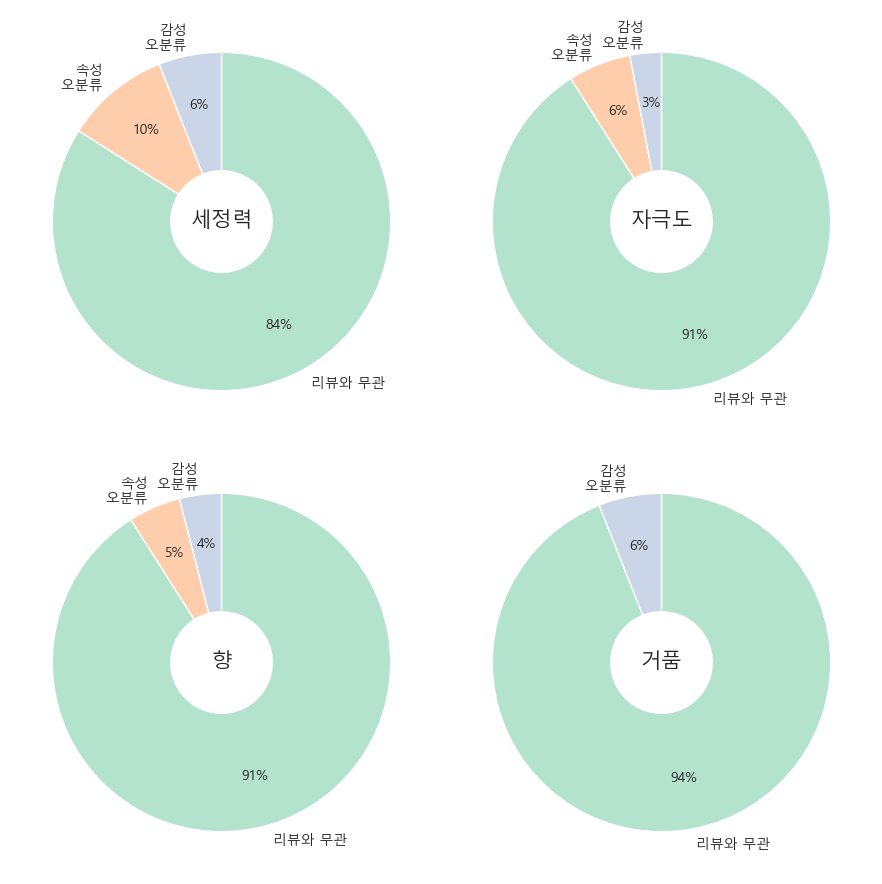

In [423]:
colors = sns.color_palette("Pastel2")
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
axs = axs.flatten()

for i in range(4):
    raw_data = ratio_df.iloc[i].values
    raw_labels = ratio_df.columns
    aspect = ratio_df.index[i]

    # 값이 0보다 큰 항목만 추림
    data = [val for val in raw_data if val > 0]
    labels = [label for val, label in zip(raw_data, raw_labels) if val > 0]
    used_colors = [color for val, color in zip(raw_data, colors) if val > 0]


    axs[i].pie(
        data,
        autopct="%.0f%%",
        labels=labels,
        colors=used_colors,
        startangle=90,
        counterclock=False,
        wedgeprops={"width": 0.7, "edgecolor": "w"},
        pctdistance=0.7,
        textprops={'size':10}
    )
    axs[i].text(0, 0, aspect, ha = "center", va = "center",fontsize=15)
    
plt.tight_layout()
plt.savefig("중립 라벨링 분석.png", transparent=True, dpi=300)
plt.show()


In [ ]:
color_map = {
    'Real이 진짜 중립': '#ff9999',   
    'Real이 귀찮아서 중립': '#66b3ff', 
    '모델 추출 오류': '#c2c2f0'       
}
colors = [color_map[k] for k in stack_order]


ax = ratio_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title('중립 리뷰 판단 비율 - 속성별 비교', fontsize=14)
plt.ylabel('비율')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='판단', loc='upper right')
plt.tight_layout()
plt.show()


#@@@@@@@@@@@@@@@@@@@

In [ ]:
an_df=df_compared.iloc[:,:-4].copy()
an_df=an_df.replace(["다소 아쉬워요","아주 만족해요","보통이에요"],[0,2,1])
an_df["자극도"]=an_df["자극도"].replace(["자극이 느껴져요","자극없이 순해요","보통이에요"],[0,2,1])
an_df["거품"]=an_df["거품"].replace(["거품이 적어요","거품이 풍성해요","보통이에요"],[0,2,1])
an_df["absa자극도"]=an_df["absa자극도"].replace(["자극이 느껴져요","자극없이 순해요","보통이에요"],[0,2,1])
an_df["absa거품"]=an_df["absa거품"].replace(["거품이 적어요","거품이 풍성해요","보통이에요"],[0,2,1])

In [260]:
an_df.head()

,제품명,브랜드,원가,판매가,리뷰수,평균별점,5점비율,4점비율,3점비율,2점비율,...,거품,향,리뷰,annotation,annotation_parsed,annotation_속성감정,absa세정력,absa자극도,absa향,absa거품
1,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,2,2,거품이나 향은 무난한데 새치 커버력이 홍보 대비 좀 아쉽네요,"[['세정', [None, 0, 0], 'negative'], ['거품', [Non...","[[세정, [None, 0, 0], negative], [거품, [None, 0, ...","세정:부정, 거품:중립, 향:중립",0,없음,1,1
6,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,2,2,항성 사용하고 있어요굿 몇 년째 모다모다샴푸만 사용해 요항성 사용하고 있어요굿 몇 ...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,0,없음,없음
8,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,1,1,남편 흰머리가 넘 많이 보여서 샀는데 회색 정도는 나오는 것 같아 요 신기하네용,"[['세정', [None, 0, 0], 'positive'], ['탈모', [Non...","[[세정, [None, 0, 0], positive], [탈모, [None, 0, ...",세정:긍정,2,없음,없음,없음
12,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,0,0,진물이 나서 딱 쟁이가 됩니다 1세대 쓰고 나름 만족해 3세대 쓰니 부작용으로 고생...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,0,없음,없음
14,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),모다모다,"78,000\n원","48,280\n원",145,4.6,78%,13%,6%,1%,...,2,2,2세대라 훨씬 좋네요. 노란색 전 모델보다 모발도 부드럽고 향도 좋아요. 효과도 좋...,"[['향', [None, 0, 0], 'positive'], ['머릿결', [Non...","[[향, [None, 0, 0], positive], [머릿결, [None, 0, ...",향:긍정,없음,없음,2,없음


In [261]:
for i in range(27,31):
    print(an_df.iloc[:, i].unique())

[1 2 0]
[2 1 0]
[2 1 0]
[2 1 0]


In [262]:
for i in range(35,39):
    print(an_df.iloc[:, i].unique())

[0 '없음' 2 1]
['없음' 0 2 1]
[1 '없음' 2 0]
[1 '없음' 2 0]


In [263]:
an_df.iloc[:,27:]

,세정력,자극도,거품,향,리뷰,annotation,annotation_parsed,annotation_속성감정,absa세정력,absa자극도,absa향,absa거품
1,1,2,2,2,거품이나 향은 무난한데 새치 커버력이 홍보 대비 좀 아쉽네요,"[['세정', [None, 0, 0], 'negative'], ['거품', [Non...","[[세정, [None, 0, 0], negative], [거품, [None, 0, ...","세정:부정, 거품:중립, 향:중립",0,없음,1,1
6,2,2,2,2,항성 사용하고 있어요굿 몇 년째 모다모다샴푸만 사용해 요항성 사용하고 있어요굿 몇 ...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,0,없음,없음
8,1,1,1,1,남편 흰머리가 넘 많이 보여서 샀는데 회색 정도는 나오는 것 같아 요 신기하네용,"[['세정', [None, 0, 0], 'positive'], ['탈모', [Non...","[[세정, [None, 0, 0], positive], [탈모, [None, 0, ...",세정:긍정,2,없음,없음,없음
12,0,0,0,0,진물이 나서 딱 쟁이가 됩니다 1세대 쓰고 나름 만족해 3세대 쓰니 부작용으로 고생...,"[['자극', [None, 0, 0], 'negative']]","[[자극, [None, 0, 0], negative]]",자극:부정,없음,0,없음,없음
14,2,2,2,2,2세대라 훨씬 좋네요. 노란색 전 모델보다 모발도 부드럽고 향도 좋아요. 효과도 좋...,"[['향', [None, 0, 0], 'positive'], ['머릿결', [Non...","[[향, [None, 0, 0], positive], [머릿결, [None, 0, ...",향:긍정,없음,없음,2,없음
...,...,...,...,...,...,...,...,...,...,...,...,...
181903,2,2,2,2,탈모샴푸 용량은 작고 비싸기만 하고 거품은 안 나고 만족도가 낮았는데 이건 잘 쓰고...,"[['거품', [None, 0, 0], 'negative'], ['가격', [Non...","[[거품, [None, 0, 0], negative], [가격, [None, 0, ...",거품:부정,없음,없음,없음,0
181904,2,2,2,2,여러 탈모샴푸 유목민하다가 정착한 유일한 샴푸에 요 거품도 잘 나고 머릿결도 부드럽...,"[['거품', [None, 0, 0], 'positive'], ['머릿결', [No...","[[거품, [None, 0, 0], positive], [머릿결, [None, 0,...",거품:긍정,없음,없음,없음,2
181905,2,2,2,2,거품이 상당히 잘 나서 긴 머리에 조 으네요 아주 만족하며 쓰고 있어요,"[['거품', [None, 0, 0], 'positive']]","[[거품, [None, 0, 0], positive]]",거품:긍정,없음,없음,없음,2
181906,2,2,2,2,모발영양에 좋은 맥주 효모랑 탈모 증상 완화에 좋은 방기원 샴푸의 조화 라니 !! ...,"[['거품', [None, 0, 0], 'positive']]","[[거품, [None, 0, 0], positive]]",거품:긍정,없음,없음,없음,2


In [264]:
selected_df = pd.concat([
    an_df.iloc[:, 27:31],   
    an_df.iloc[:, -4:]      
], axis=1)

In [265]:
selected_df.head()

,세정력,자극도,거품,향,absa세정력,absa자극도,absa향,absa거품
1,1,2,2,2,0,없음,1,1
6,2,2,2,2,없음,0,없음,없음
8,1,1,1,1,2,없음,없음,없음
12,0,0,0,0,없음,0,없음,없음
14,2,2,2,2,없음,없음,2,없음


In [266]:
avg_scores = []
cols = ["세정력", "자극도", "거품", "향", "absa세정력", "absa자극도", "absa거품", "absa향"]
for col in cols:
    numeric_col = pd.to_numeric(selected_df[col], errors='coerce')
    avg_score = numeric_col.mean()
    avg_scores.append(avg_score)  
    print(f"{col} 평균 만족도: {avg_score:.2f}")

세정력 평균 만족도: 1.73
자극도 평균 만족도: 1.74
거품 평균 만족도: 1.68
향 평균 만족도: 1.67
absa세정력 평균 만족도: 1.84
absa자극도 평균 만족도: 1.88
absa거품 평균 만족도: 1.76
absa향 평균 만족도: 1.79


In [267]:
avg_df = pd.DataFrame({
    "속성": cols,
    "평균만족도": avg_scores
})

In [268]:
avg_df

,속성,평균만족도
0,세정력,1.731740
1,자극도,1.735130
2,거품,1.683726
3,향,1.670185
4,absa세정력,1.835344
5,absa자극도,1.882469
6,absa거품,1.760463
7,absa향,1.785395


In [269]:
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
final_df.head()

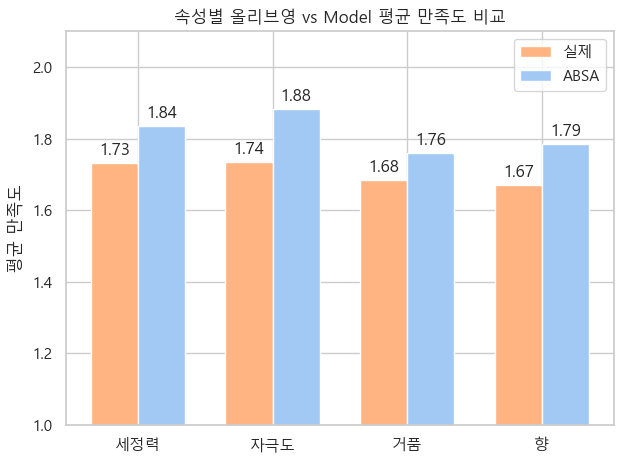

In [553]:
labels = ['세정력', '자극도', '거품', '향']
real_scores = avg_scores[:4]
absa_scores = avg_scores[4:]

colors = sns.color_palette("pastel")
real_color = colors[1]  # 예: 연한 초록, 기본 값 중 하나
absa_color = colors[0]    # 파란 계열 (pastel 첫 번째)


x = np.arange(len(labels))           
width = 0.35                        


fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, real_scores, width, label='실제', color = real_color)
bar2 = ax.bar(x + width/2, absa_scores, width, label='ABSA', color = absa_color)

ax.set_ylabel('평균 만족도')
ax.set_title('속성별 올리브영 vs Model 평균 만족도 비교')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.ylim(1, 2.1)
plt.tight_layout()
plt.savefig("속성별 올리브영,Model.png", transparent=True, dpi=300)
plt.show()


상품별 속성별 긍정,부정,중립 비율 비교

없음 무시, 제외

In [273]:
an_df["리뷰수"] = an_df["리뷰수"].astype(str).str.replace(",", "", regex=False)
an_df["리뷰수"] = an_df["리뷰수"].astype(int)

In [274]:
dn_df = an_df[["제품명", "세정력", "자극도", "거품", "향", "absa세정력", "absa자극도", "absa거품", "absa향"]]

In [275]:
len(dn_df[dn_df["향"]==1])

36662

In [276]:
dn_df.head()

,제품명,세정력,자극도,거품,향,absa세정력,absa자극도,absa거품,absa향
1,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),1,2,2,2,0,없음,1,1
6,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),2,2,2,2,없음,0,없음,없음
8,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),1,1,1,1,2,없음,없음,없음
12,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),0,0,0,0,없음,0,없음,없음
14,모다모다 제로그레이 블랙샴푸10 더블기획 (300g+300g),2,2,2,2,없음,없음,없음,2


In [ ]:
dn_df['absa세정력'] = dn_df['absa세정력'].replace('없음', pd.NA).astype('Int64')
dn_df['absa자극도'] = dn_df['absa자극도'].replace('없음', pd.NA).astype('Int64')
dn_df['absa거품']  = dn_df['absa거품'].replace('없음', pd.NA).astype('Int64')
dn_df['absa향']    = dn_df['absa향'].replace('없음', pd.NA).astype('Int64')

In [278]:
real_ratio = pd.concat([
    dn_df.groupby('제품명')['세정력'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: '세정력_부정', 1: '세정력_중립', 2: '세정력_긍정'}),
    dn_df.groupby('제품명')['자극도'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: '자극도_부정', 1: '자극도_중립', 2: '자극도_긍정'}),
    dn_df.groupby('제품명')['거품'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: '거품_부정', 1: '거품_중립', 2: '거품_긍정'}),
    dn_df.groupby('제품명')['향'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: '향_부정', 1: '향_중립', 2: '향_긍정'})
], axis=1)
#real_ratio.head()

In [279]:
absa_ratio = pd.concat([
    dn_df.dropna(subset=['absa세정력']).groupby('제품명')['absa세정력'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: 'absa세정력_부정', 1: 'absa세정력_중립', 2: 'absa세정력_긍정'}),
    dn_df.dropna(subset=['absa자극도']).groupby('제품명')['absa자극도'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: 'absa자극도_부정', 1: 'absa자극도_중립', 2: 'absa자극도_긍정'}),
    dn_df.dropna(subset=['absa거품']).groupby('제품명')['absa거품'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: 'absa거품_부정', 1: 'absa거품_중립', 2: 'absa거품_긍정'}),
    dn_df.dropna(subset=['absa향']).groupby('제품명')['absa향'].value_counts(normalize=True).unstack().fillna(0).rename(columns={0: 'absa향_부정', 1: 'absa향_중립', 2: 'absa향_긍정'})
], axis=1)
#absa_ratio.head()

In [280]:
product_ratio_df = pd.concat([real_ratio, absa_ratio], axis=1).fillna(0)

In [281]:
product_ratio_df

,세정력_부정,세정력_중립,세정력_긍정,자극도_부정,자극도_중립,자극도_긍정,거품_부정,거품_중립,거품_긍정,향_부정,...,absa세정력_긍정,absa자극도_부정,absa자극도_중립,absa자극도_긍정,absa거품_부정,absa거품_중립,absa거품_긍정,absa향_부정,absa향_중립,absa향_긍정
제품명,,,,,,,,,,,,,,,,,,,,,
TS BD샴푸 500g,0.012048,0.397590,0.590361,0.006024,0.373494,0.620482,0.030120,0.379518,0.590361,0.042169,...,0.94,0.121212,0.0,0.878788,0.134328,0.014925,0.850746,0.118644,0.220339,0.661017
TS 프리미엄 샴푸 (본품500g+140g+6gx10매 추가 증정),0.010040,0.263052,0.726908,0.008032,0.263052,0.728916,0.030120,0.275100,0.694779,0.068273,...,0.947137,0.063492,0.0,0.936508,0.086792,0.037736,0.875472,0.158996,0.217573,0.623431
[-7도 급속쿨링] 닥터그루트 아쿠아 딥클린 쿨링 샴푸 330ml,0.005376,0.088710,0.905914,0.010753,0.209677,0.779570,0.005376,0.099462,0.895161,0.013441,...,0.983766,0.013699,0.0,0.986301,0.014286,0.009524,0.97619,0.019868,0.099338,0.880795
[1&1/지성샴푸] 아도르 비건 사과 식초 샴푸 더블 기획 (430ml+430ml),0.005118,0.032753,0.962129,0.001024,0.021494,0.977482,0.004094,0.064483,0.931423,0.006141,...,0.983452,0.010753,0.0,0.989247,0.016453,0.003656,0.97989,0.011734,0.026076,0.96219
[1+1]스웨거 헤어 디펜더 안티헤어로스 샴푸 490ml 더블 기획,0.000000,0.321429,0.678571,0.000000,0.285714,0.714286,0.000000,0.357143,0.642857,0.000000,...,0.833333,0.0,0.0,1.0,0.0,0.0625,0.9375,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
헤어플러스 블랙 본드 톤다운 샴푸 300ml,0.097561,0.658537,0.243902,0.024390,0.463415,0.512195,0.268293,0.487805,0.243902,0.170732,...,0.285714,0.2,0.0,0.8,0.52381,0.142857,0.333333,0.115385,0.346154,0.538462
헤어플러스 실크 코팅 샴푸 1000ml,0.000000,0.347826,0.652174,0.000000,0.304348,0.695652,0.000000,0.304348,0.695652,0.000000,...,0.75,0.25,0.0,0.75,0.090909,0.0,0.909091,0.0,0.0625,0.9375
헤어플러스 컬러본드 보색 샴푸 300ml,0.057099,0.478395,0.464506,0.020062,0.342593,0.637346,0.060185,0.256173,0.683642,0.035494,...,0.693727,0.149068,0.006211,0.84472,0.149184,0.048951,0.801865,0.075,0.178125,0.746875


# 시각화

In [282]:
colors = sns.color_palette("pastel")
real_color = colors[1]
absa_color = colors[0]
sentiments = ['부정', '중립', '긍정']
aspects = ['세정력', '자극도', '거품', '향']

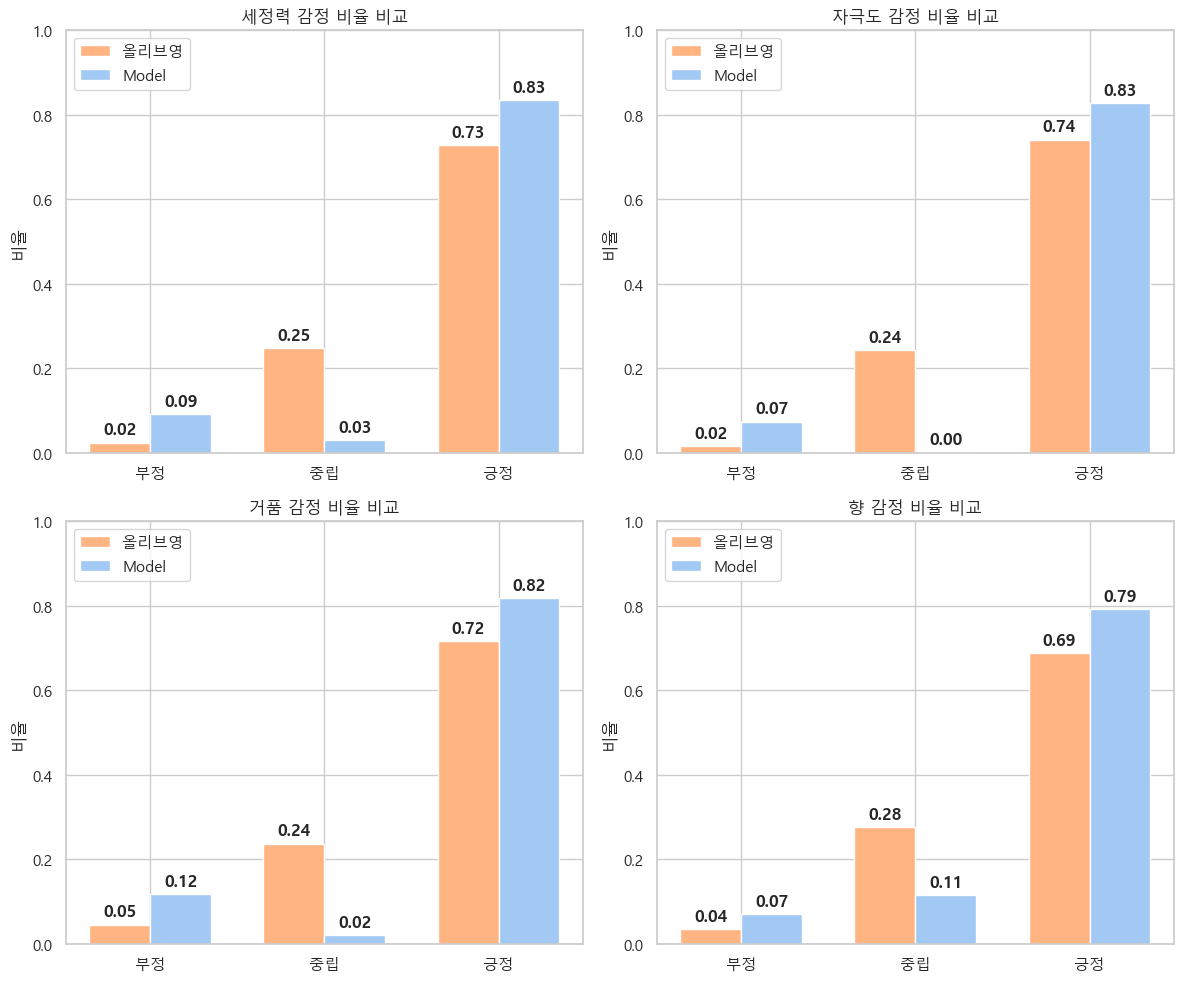

In [554]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, aspect in enumerate(aspects):
    ax = axes[idx]
    
    real_cols = [f'{aspect}_{s}' for s in sentiments]
    absa_cols = [f'absa{aspect}_{s}' for s in sentiments]

    real_means = product_ratio_df[real_cols].mean().values
    absa_means = product_ratio_df[absa_cols].mean().values

    x = np.arange(len(sentiments))
    width = 0.35

    bar1 = ax.bar(x - width/2, real_means, width, label='올리브영', color=real_color)
    bar2 = ax.bar(x + width/2, absa_means, width, label='Model', color=absa_color)

    ax.set_ylabel('비율')
    ax.set_title(f'{aspect} 감정 비율 비교')
    ax.set_xticks(x)
    ax.set_xticklabels(sentiments)
    ax.set_ylim(0, 1)
    ax.legend(loc='upper left')

    for bar in bar1 + bar2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontweight='bold')

for j in range(len(aspects), 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("속성별 감정 비율 비교.png", transparent=True, dpi=300)
plt.show()


In [308]:
selected_df.iloc[:,0].value_counts()

세정력
2    106229
1     32694
0      2641
Name: count, dtype: int64

In [344]:
count_df = selected_df.copy()
count_df = count_df.astype(object)

In [347]:
count_df

,세정력,자극도,거품,향,absa세정력,absa자극도,absa향,absa거품
1,1,2,2,2,0,없음,1,1
6,2,2,2,2,없음,0,없음,없음
8,1,1,1,1,2,없음,없음,없음
12,0,0,0,0,없음,0,없음,없음
14,2,2,2,2,없음,없음,2,없음
...,...,...,...,...,...,...,...,...
181903,2,2,2,2,없음,없음,없음,0
181904,2,2,2,2,없음,없음,없음,2
181905,2,2,2,2,없음,없음,없음,2
181906,2,2,2,2,없음,없음,없음,2


In [362]:
for j in range(len(count_df)):
    for i in range(4, 8):
        value = count_df.iloc[j,i]
        if value == "없음":
            count_df.iloc[j,i-4]="없음"


In [363]:
count_df

,세정력,자극도,거품,향,absa세정력,absa자극도,absa향,absa거품
1,1,없음,2,2,0,없음,1,1
6,없음,2,없음,없음,없음,0,없음,없음
8,1,없음,없음,없음,2,없음,없음,없음
12,없음,0,없음,없음,없음,0,없음,없음
14,없음,없음,2,없음,없음,없음,2,없음
...,...,...,...,...,...,...,...,...
181903,없음,없음,없음,2,없음,없음,없음,0
181904,없음,없음,없음,2,없음,없음,없음,2
181905,없음,없음,없음,2,없음,없음,없음,2
181906,없음,없음,없음,2,없음,없음,없음,2


In [450]:
count_df.iloc[:,:4]

,세정력,자극도,거품,향
1,1,없음,2,2
6,없음,2,없음,없음
8,1,없음,없음,없음
12,없음,0,없음,없음
14,없음,없음,2,없음
...,...,...,...,...
181903,없음,없음,없음,2
181904,없음,없음,없음,2
181905,없음,없음,없음,2
181906,없음,없음,없음,2


In [529]:
count_df.iloc[:,4:]

,absa세정력,absa자극도,absa향,absa거품
1,0,없음,1,1
6,없음,0,없음,없음
8,2,없음,없음,없음
12,없음,0,없음,없음
14,없음,없음,2,없음
...,...,...,...,...
181903,없음,없음,없음,0
181904,없음,없음,없음,2
181905,없음,없음,없음,2
181906,없음,없음,없음,2


In [537]:
counts = count_df.iloc[:,:4].stack().value_counts()


counts_df = counts.reset_index()
counts_df.columns = ['Value', 'Count']

counts_df

,Value,Count
0,없음,297982
1,2,202293
2,1,57864
3,0,8117


In [538]:
absa_counts = count_df.iloc[:,4:].stack().value_counts()


absa_counts_df = absa_counts.reset_index()
absa_counts_df.columns = ['Value', 'Count']

absa_counts_df

,Value,Count
0,없음,297982
1,2,236465
2,0,20692
3,1,11117


In [539]:
counts_df.iloc[1,0]="긍정"
counts_df.iloc[2,0]="중립"
counts_df.iloc[3,0]="부정"
absa_counts_df.iloc[1,0]="긍정"
absa_counts_df.iloc[2,0]="중립"
absa_counts_df.iloc[3,0]="부정"

In [540]:
counts_df=counts_df.drop([0])
absa_counts_df=absa_counts_df.drop([0])

In [541]:
counts_df['normalized'] = counts_df["Count"] / counts_df["Count"].sum()
absa_counts_df['normalized'] = absa_counts_df["Count"] / absa_counts_df["Count"].sum()

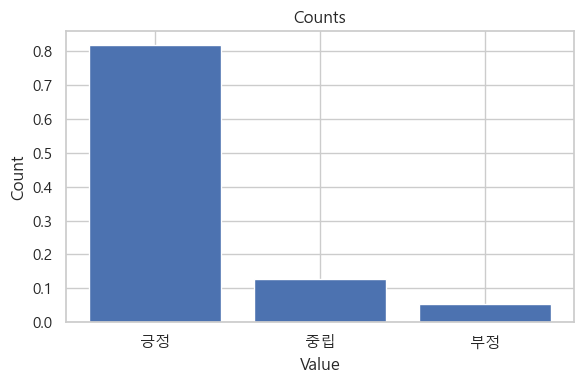

In [513]:
plt.figure(figsize=(6, 4))
plt.bar(counts_df['Value'], counts_df['normalized'])
plt.title('Counts')
plt.xlabel('Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


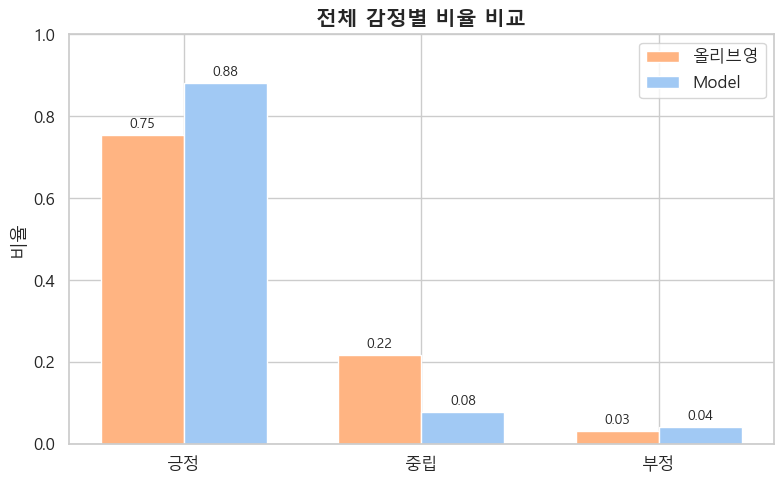

In [551]:
labels = counts_df['Value']  
x = np.arange(len(labels))   

width = 0.35  

plt.figure(figsize=(8, 5))

plt.bar(x - width/2, counts_df['normalized'], width=width, label='올리브영', color=colors[1])
plt.bar(x + width/2, absa_counts_df['normalized'], width=width, label='Model', color=colors[0])

plt.title('전체 감정별 비율 비교', fontsize=15, fontweight='bold')
plt.ylabel('비율', fontsize=13)
plt.xticks(x, labels, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)
plt.legend(fontsize=12)


for i, (v1, v2) in enumerate(zip(counts_df['normalized'], absa_counts_df['normalized'])):
    plt.text(i - width/2, v1 + 0.01, f'{v1:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i + width/2, v2 + 0.01, f'{v2:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("전체 감정별 비율 비교.png", transparent=True, dpi=300)
plt.show()
